In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import register_matplotlib_converters

In [231]:
%matplotlib inline

# Data Is Supplied

In [232]:
df = pd.read_excel("data.xlsx")
df.head()

,S/N,City,Date,Male,Female,Total
0,1,Chibok,2014-04-14,0,276,276
1,2,Dapchi,2018-02-19,0,110,110
2,3,Kankara,2020-12-16,300,0,300
3,4,Kagara,2021-02-17,0,27,27
4,5,Dapchi,2021-02-19,0,110,110


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   S/N     9 non-null      int64         
 1   City    9 non-null      object        
 2   Date    9 non-null      datetime64[ns]
 3   Male    9 non-null      int64         
 4   Female  9 non-null      int64         
 5   Total   9 non-null      int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 560.0+ bytes


In [234]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   S/N     9 non-null      int64         
 1   City    9 non-null      object        
 2   Date    9 non-null      datetime64[ns]
 3   Male    9 non-null      int64         
 4   Female  9 non-null      int64         
 5   Total   9 non-null      int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 560.0+ bytes


# Kidngapping Rate Male

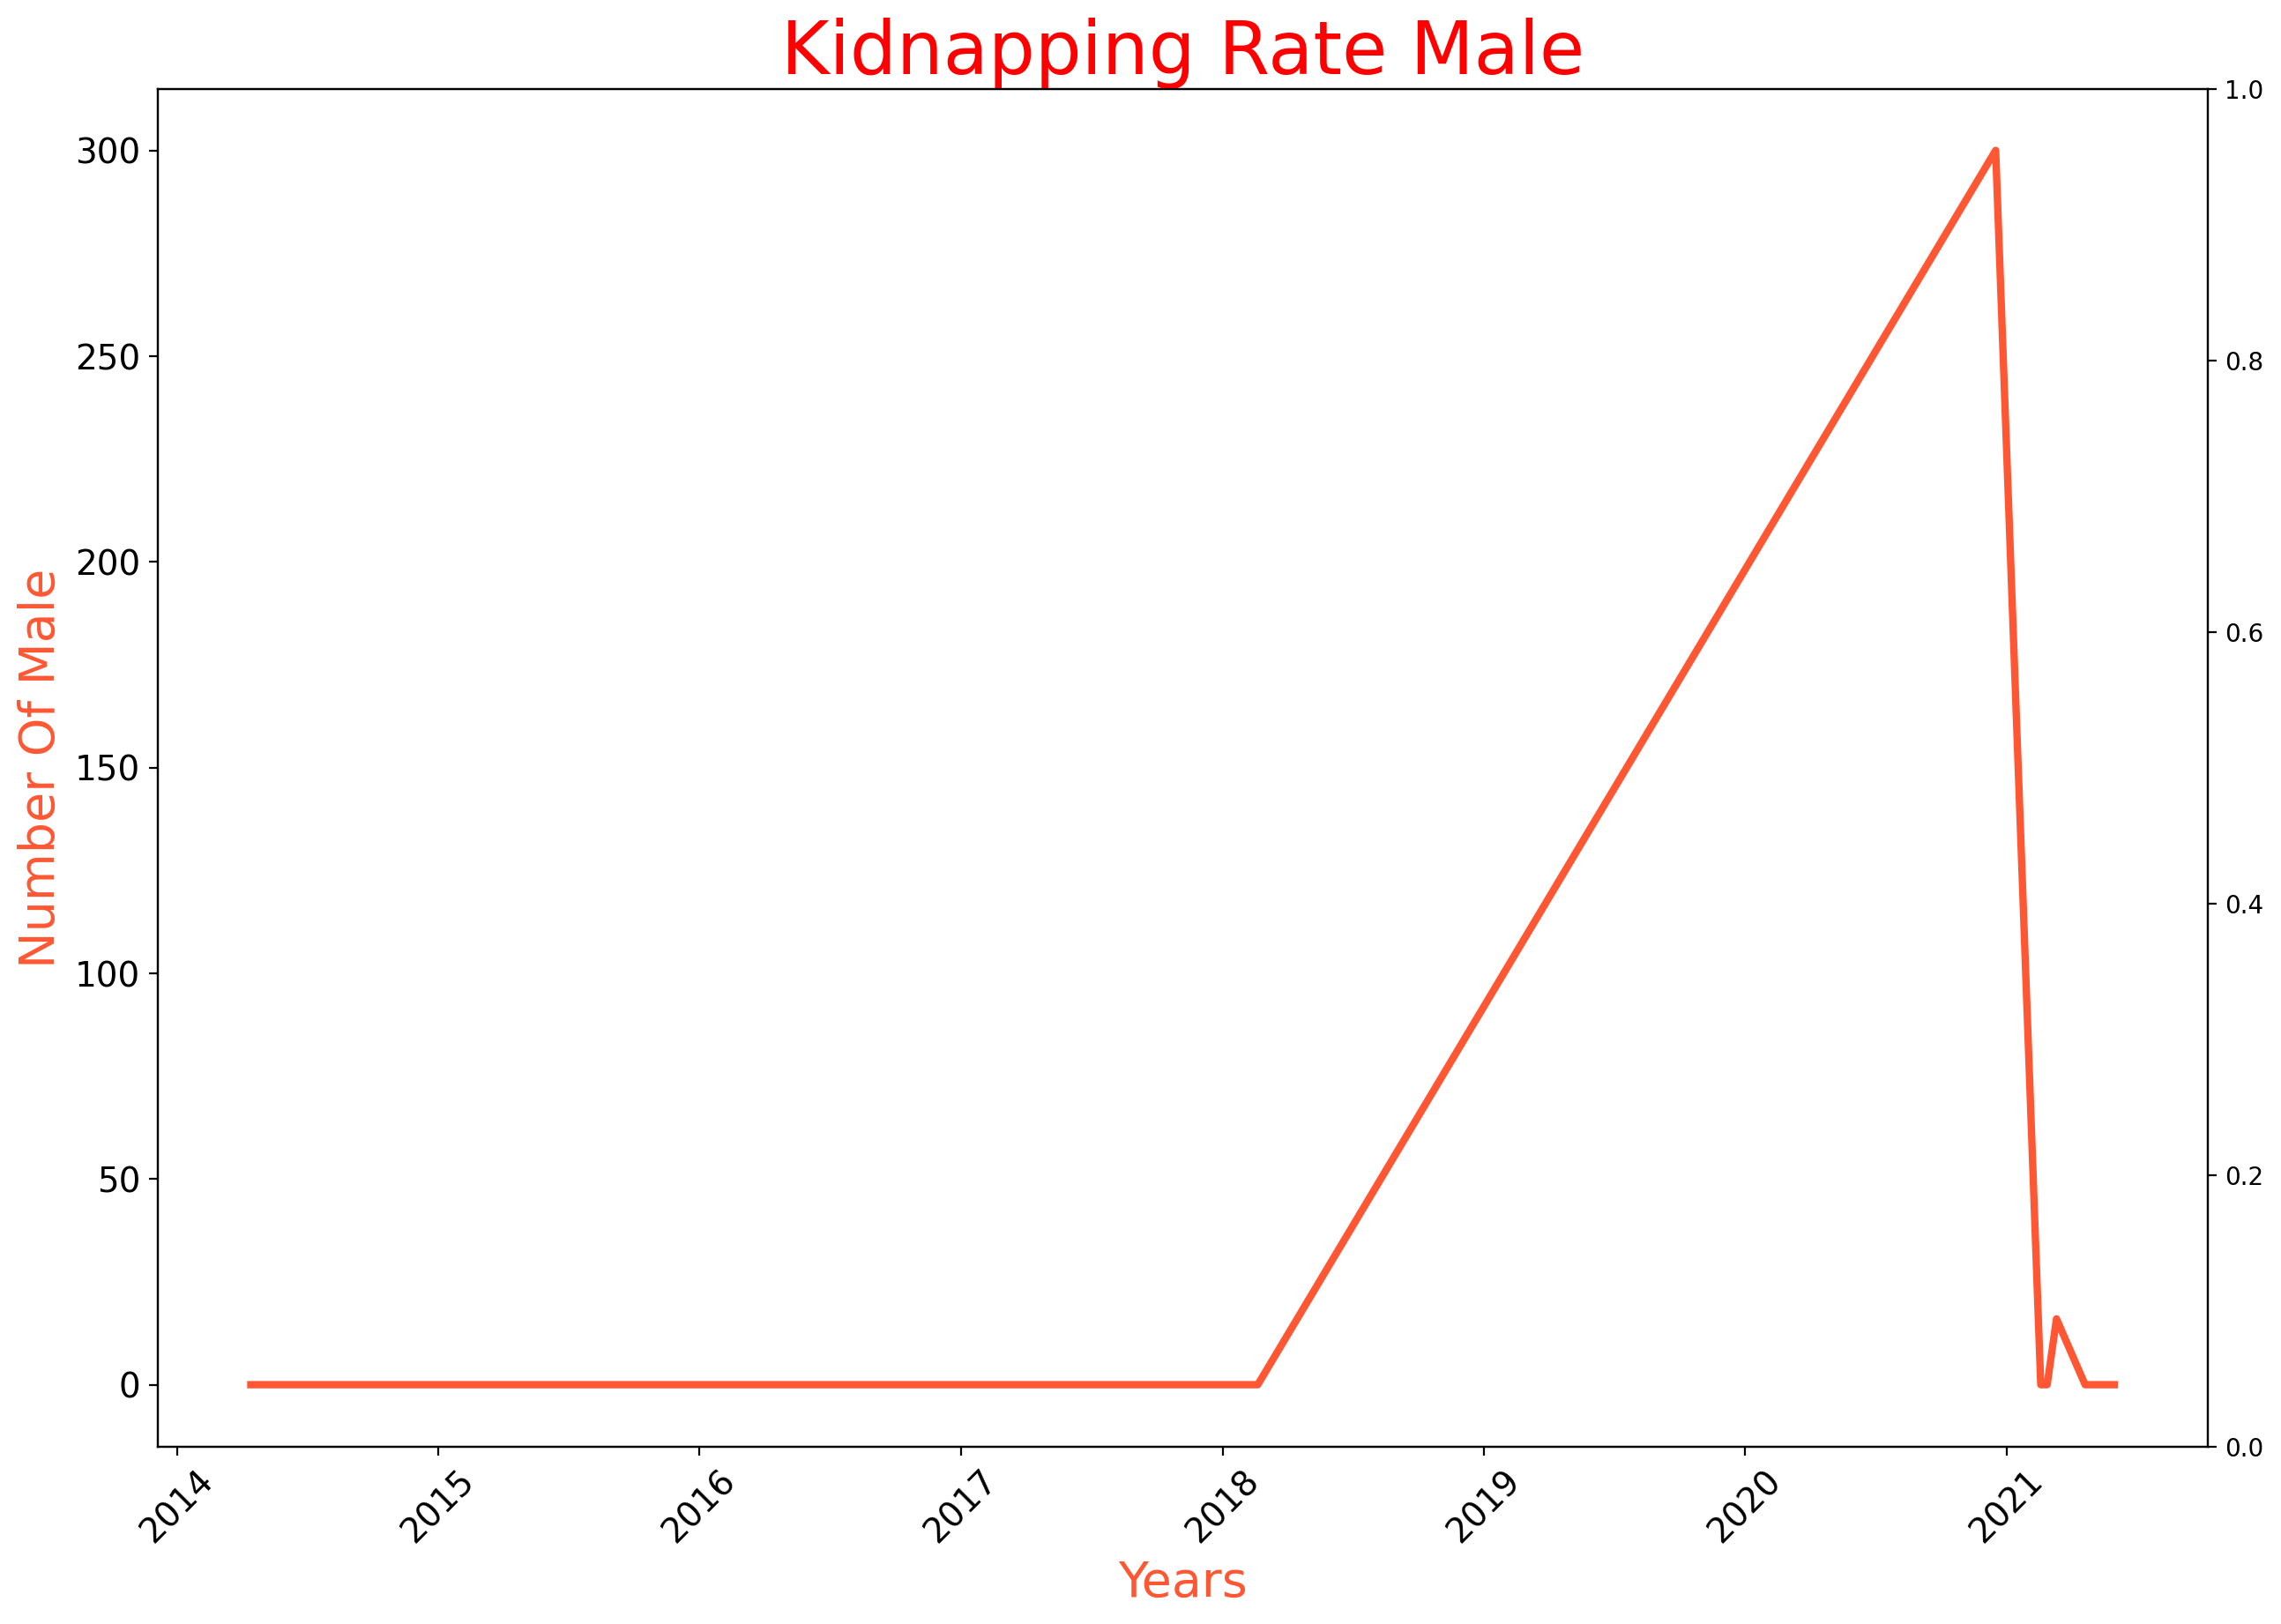

In [235]:
register_matplotlib_converters()

plt.figure(figsize=(15,10), dpi=200)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title("Kidnapping Rate Male", fontsize=30, color="red")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel("Number Of Male", color="#FF5733", fontsize=20)
ax1.set_xlabel("Years", color="#FF5733", fontsize=20)
ax1.plot(df.Date, df.Male, color="#FF5733", linewidth=3)
plt.show()

# Kidnapping Rate Female

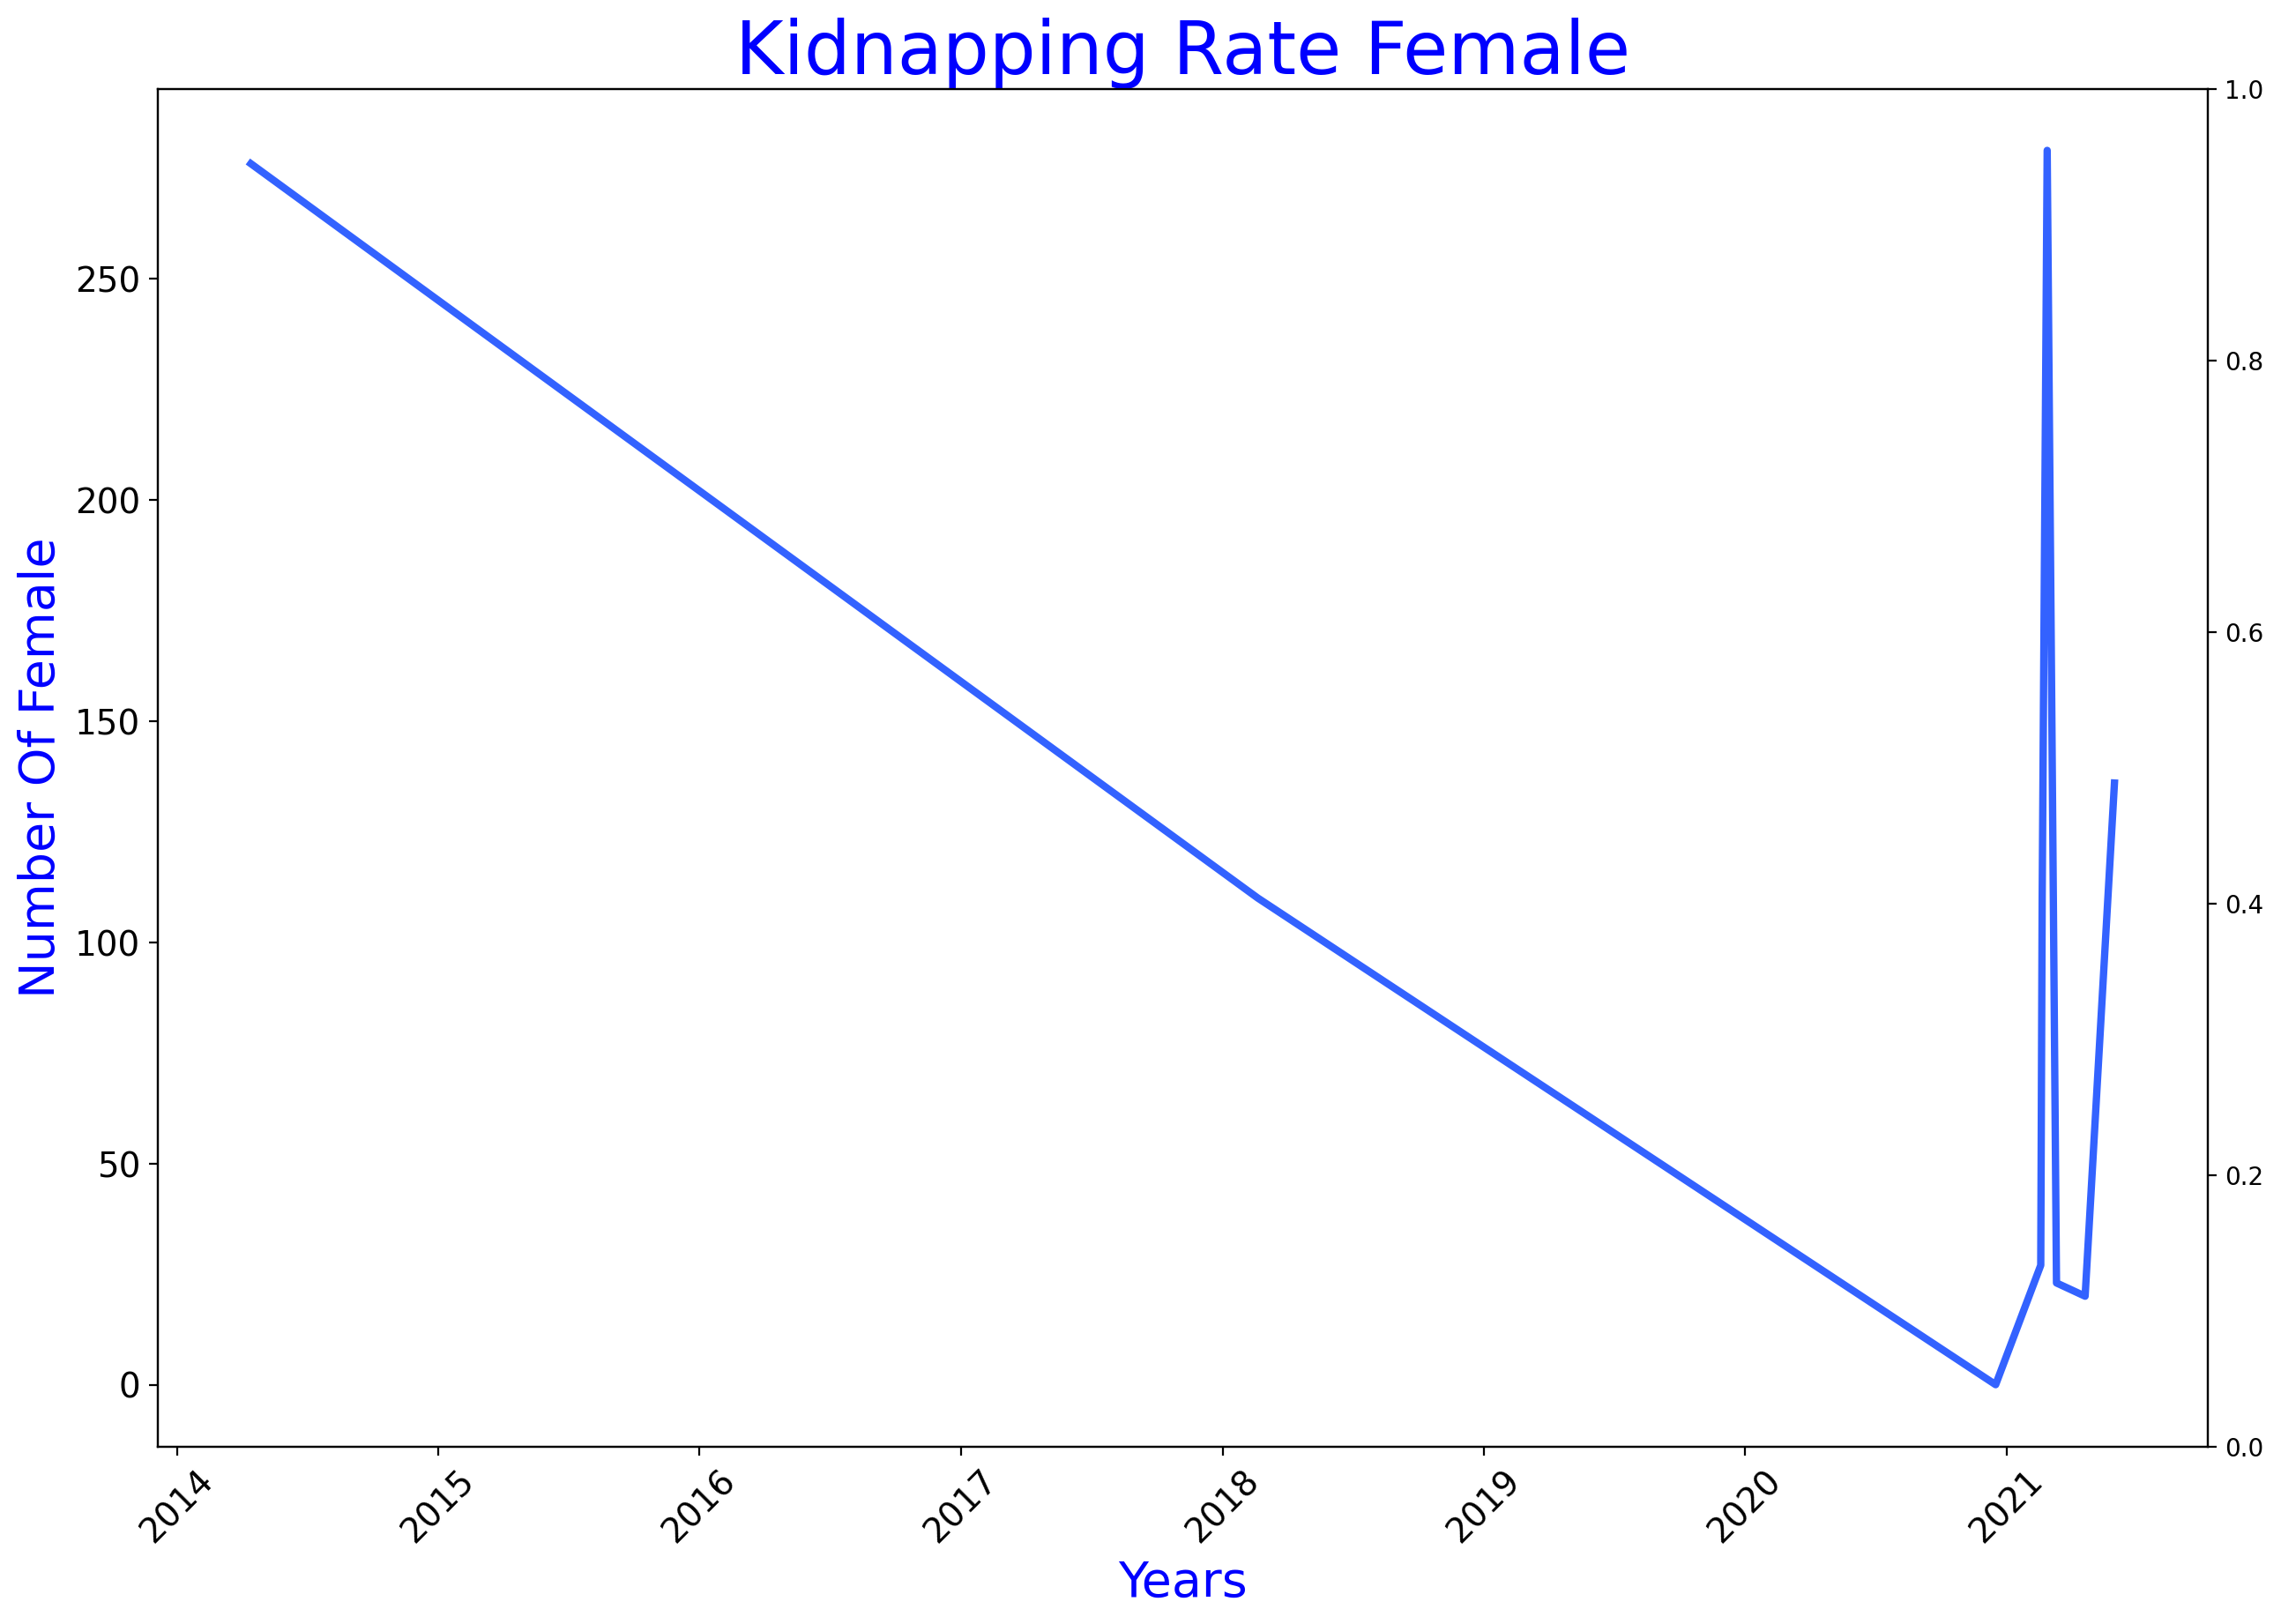

In [236]:
register_matplotlib_converters()


plt.figure(figsize=(15,10), dpi=200)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title("Kidnapping Rate Female", fontsize=30, color="blue")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel("Number Of Female", color="blue", fontsize=20)
ax1.set_xlabel("Years", color="blue", fontsize=20)
ax1.plot(df.Date, df.Female, color="#3362FF", linewidth=3)
plt.show()

# Kidnapping Rate Male Vs Female

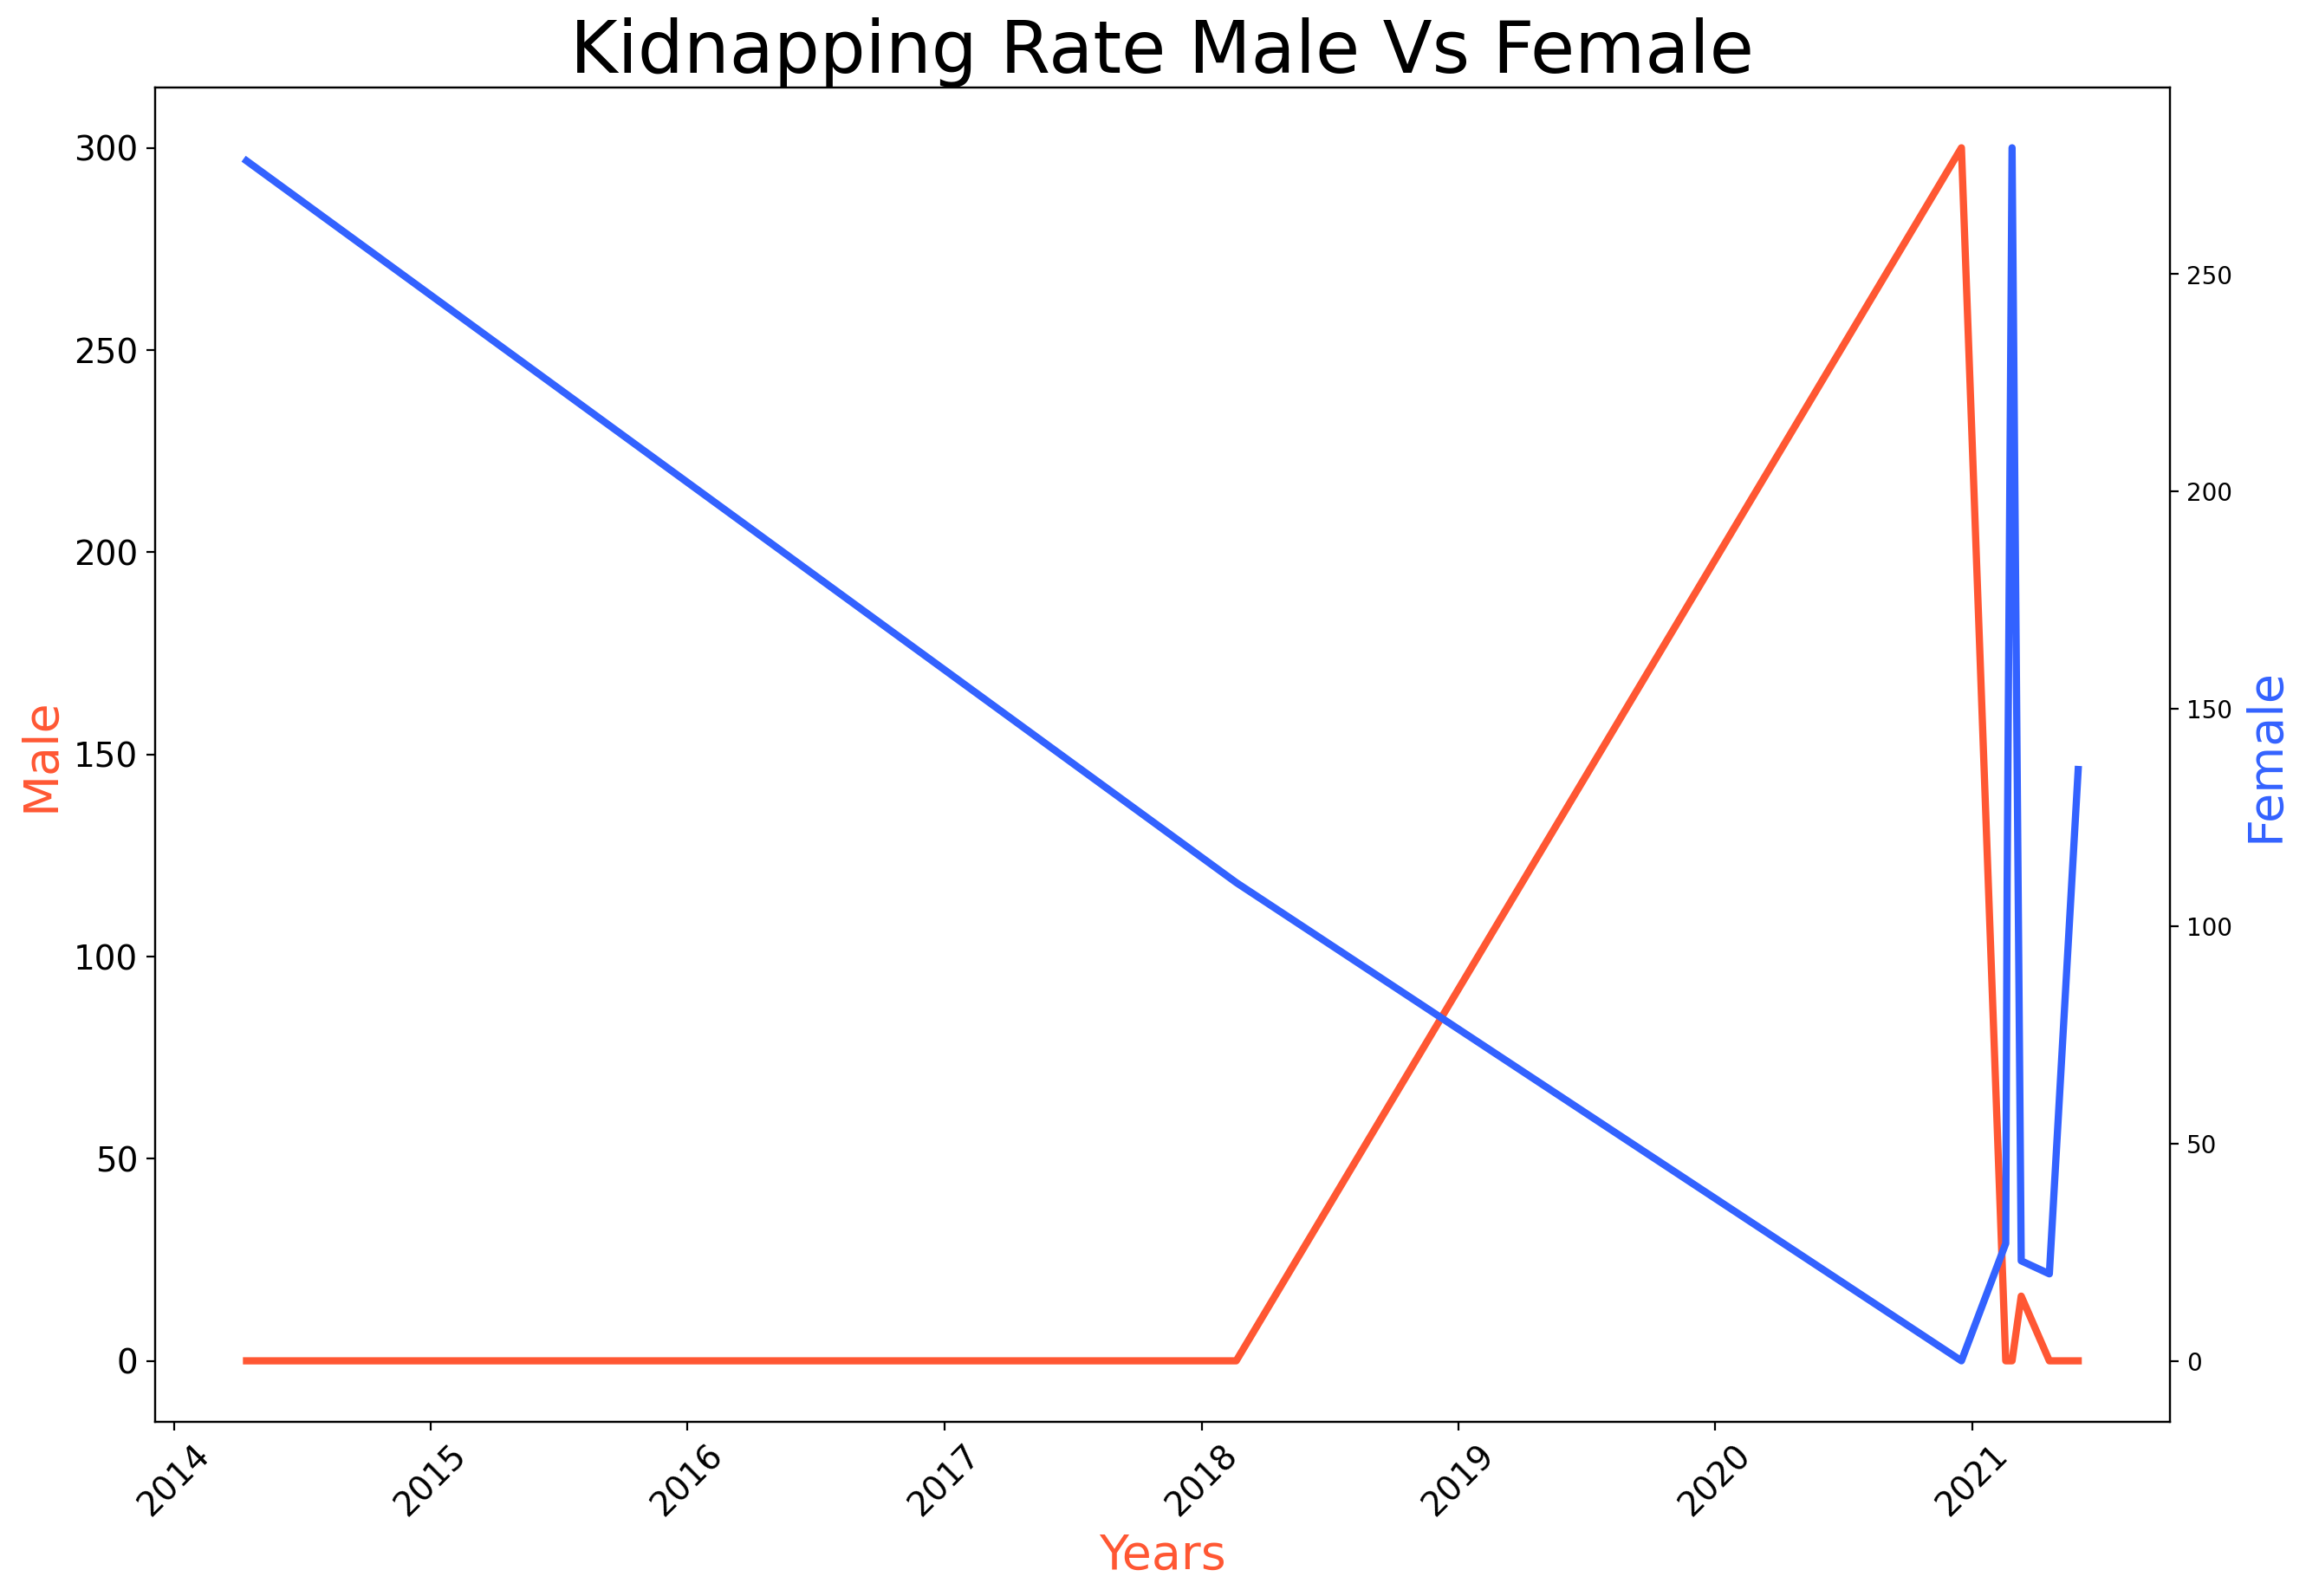

In [237]:
register_matplotlib_converters()


plt.figure(figsize=(15,10), dpi=200)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title("Kidnapping Rate Male Vs Female", fontsize=30, color="black")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel("Male", color="#FF5733", fontsize=20)
ax1.set_xlabel("Years", color="#FF5733", fontsize=20)
ax2.set_ylabel("Female", color="#3362FF", fontsize=20)
ax1.plot(df.Date, df.Male, color="#FF5733", linewidth=3)
ax2.plot(df.Date, df.Female, color="#3362FF", linewidth=3)
plt.show()

In [238]:
df.head()

,S/N,City,Date,Male,Female,Total
0,1,Chibok,2014-04-14,0,276,276
1,2,Dapchi,2018-02-19,0,110,110
2,3,Kankara,2020-12-16,300,0,300
3,4,Kagara,2021-02-17,0,27,27
4,5,Dapchi,2021-02-19,0,110,110


In [241]:
df_cat_city = df.groupby(["City"], as_index=False).agg({"Total":pd.Series.sum})
df_cat_city

,City,Total
0,Chibok,276
1,Chikun,20
2,Dapchi,220
3,Jangebe,279
4,Kaduna,39
5,Kagara,27
6,Kankara,300
7,Salihu Tanko,136


# Kidnapping Rate By Cities

In [242]:
plt.figure(figsize=(20,15))
v_bar_split = px.bar(x = df_cat_city.City,
                     y = df_cat_city.Total,
                     color = df_cat_city.City,
                     title='Number of Kidnappings per City')
 
v_bar_split.update_layout(xaxis_title='Cities', 
                          yaxis_title='Number of Kidnapings')
v_bar_split.show()

<Figure size 2000x1500 with 0 Axes>

In [243]:
df

,S/N,City,Date,Male,Female,Total
0,1,Chibok,2014-04-14,0,276,276
1,2,Dapchi,2018-02-19,0,110,110
2,3,Kankara,2020-12-16,300,0,300
3,4,Kagara,2021-02-17,0,27,27
4,5,Dapchi,2021-02-19,0,110,110
5,6,Jangebe,2021-02-26,0,279,279
6,7,Kaduna,2021-03-11,16,23,39
7,8,Chikun,2021-04-20,0,20,20
8,9,Salihu Tanko,2021-05-31,0,136,136


In [244]:
kidnappings_per_year = df.groupby("Date").sum().Total
kidnappings_per_year

Date
2014-04-14    276
2018-02-19    110
2020-12-16    300
2021-02-17     27
2021-02-19    110
2021-02-26    279
2021-03-11     39
2021-04-20     20
2021-05-31    136
Name: Total, dtype: int64

In [245]:
moving_average = kidnappings_per_year.rolling(window=5).mean()
moving_average

Date
2014-04-14      NaN
2018-02-19      NaN
2020-12-16      NaN
2021-02-17      NaN
2021-02-19    164.6
2021-02-26    165.2
2021-03-11    151.0
2021-04-20     95.0
2021-05-31    116.8
Name: Total, dtype: float64

# Kidnapping Rate Per Year

In [246]:
df_cat_year = df.groupby(["Date"], as_index=False).agg({"Total":pd.Series.sum})
df_cat_year

,Date,Total
0,2014-04-14,276
1,2018-02-19,110
2,2020-12-16,300
3,2021-02-17,27
4,2021-02-19,110
5,2021-02-26,279
6,2021-03-11,39
7,2021-04-20,20
8,2021-05-31,136


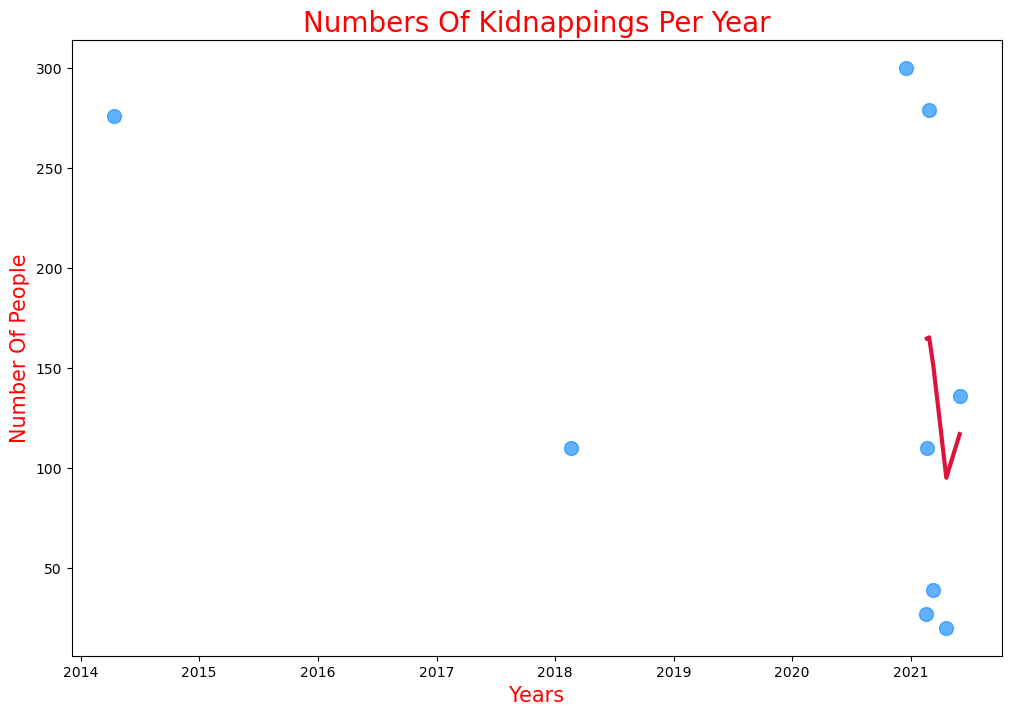

In [247]:
plt.figure(figsize=(12,8))
plt.xlabel("Years", fontsize=15, color="red")
plt.ylabel("Number Of People", fontsize=15, color="red")
plt.title("Numbers Of Kidnappings Per Year", fontsize=20, color="red")
plt.scatter(x=kidnappings_per_year.index, y=kidnappings_per_year.values, c='dodgerblue', alpha=0.7, s=100,)
plt.plot(kidnappings_per_year.index, moving_average.values, c='crimson', linewidth=3,)
plt.show()

In [248]:
kidnappings_per_city = df.groupby("City").sum().Total
kidnappings_per_city

City
Chibok          276
Chikun           20
Dapchi          220
Jangebe         279
Kaduna           39
Kagara           27
Kankara         300
Salihu Tanko    136
Name: Total, dtype: int64

In [249]:
moving_average_city = kidnappings_per_city.rolling(window=5).mean()
moving_average_city

City
Chibok            NaN
Chikun            NaN
Dapchi            NaN
Jangebe           NaN
Kaduna          166.8
Kagara          117.0
Kankara         173.0
Salihu Tanko    156.2
Name: Total, dtype: float64

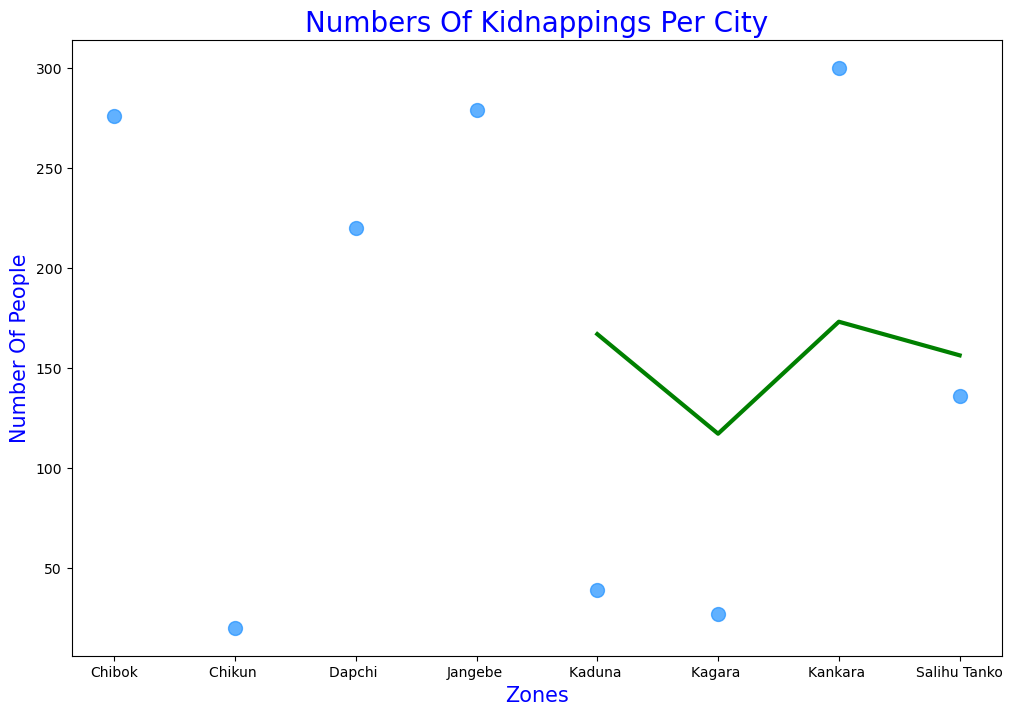

In [250]:
plt.figure(figsize=(12,8))
plt.xlabel("Zones", fontsize=15, color="blue")
plt.ylabel("Number Of People", fontsize=15, color="blue")
plt.title("Numbers Of Kidnappings Per City", fontsize=20, color="blue")
plt.scatter(x=kidnappings_per_city.index, y=kidnappings_per_city.values, c='dodgerblue', alpha=0.7, s=100,)
plt.plot(kidnappings_per_city.index, moving_average_city.values, c='green', linewidth=3,)
plt.show()

In [258]:
df

,S/N,City,Date,Male,Female,Total
0,1,Chibok,2014-04-14,0,276,276
1,2,Dapchi,2018-02-19,0,110,110
2,3,Kankara,2020-12-16,300,0,300
3,4,Kagara,2021-02-17,0,27,27
4,5,Dapchi,2021-02-19,0,110,110
5,6,Jangebe,2021-02-26,0,279,279
6,7,Kaduna,2021-03-11,16,23,39
7,8,Chikun,2021-04-20,0,20,20
8,9,Salihu Tanko,2021-05-31,0,136,136


In [260]:
df_new = df
a = df_new.copy()

In [262]:
df_new

,S/N,City,Date,Male,Female,Total
0,1,Chibok,2014-04-14,0,276,276
1,2,Dapchi,2018-02-19,0,110,110
2,3,Kankara,2020-12-16,300,0,300
3,4,Kagara,2021-02-17,0,27,27
4,5,Dapchi,2021-02-19,0,110,110
5,6,Jangebe,2021-02-26,0,279,279
6,7,Kaduna,2021-03-11,16,23,39
7,8,Chikun,2021-04-20,0,20,20
8,9,Salihu Tanko,2021-05-31,0,136,136


In [263]:
df_new["City"] = df_new["City"].astype("category")
df_new["City"] = df_new["City"].cat.codes
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   S/N     9 non-null      int64         
 1   City    9 non-null      int8          
 2   Date    9 non-null      datetime64[ns]
 3   Male    9 non-null      int64         
 4   Female  9 non-null      int64         
 5   Total   9 non-null      int64         
dtypes: datetime64[ns](1), int64(4), int8(1)
memory usage: 497.0 bytes


In [264]:
df_new.Date = df_new.Date.astype("str")
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S/N     9 non-null      int64 
 1   City    9 non-null      int8  
 2   Date    9 non-null      object
 3   Male    9 non-null      int64 
 4   Female  9 non-null      int64 
 5   Total   9 non-null      int64 
dtypes: int64(4), int8(1), object(1)
memory usage: 497.0+ bytes


In [265]:
df_new

,S/N,City,Date,Male,Female,Total
0,1,0,2014-04-14,0,276,276
1,2,2,2018-02-19,0,110,110
2,3,6,2020-12-16,300,0,300
3,4,5,2021-02-17,0,27,27
4,5,2,2021-02-19,0,110,110
5,6,3,2021-02-26,0,279,279
6,7,4,2021-03-11,16,23,39
7,8,1,2021-04-20,0,20,20
8,9,7,2021-05-31,0,136,136


In [283]:
new_series = []

for i in df_new["Date"]:
    le = int((i.split("-")[0]))
    new_series.append(le)
    
new_series = pd.DataFrame(new_series)
new_series

,0
0,2014
1,2018
2,2020
3,2021
4,2021
5,2021
6,2021
7,2021
8,2021


In [285]:
df_new["target"] = new_series
df_new

,S/N,City,Date,Male,Female,Total,target
0,1,0,2014-04-14,0,276,276,2014
1,2,2,2018-02-19,0,110,110,2018
2,3,6,2020-12-16,300,0,300,2020
3,4,5,2021-02-17,0,27,27,2021
4,5,2,2021-02-19,0,110,110,2021
5,6,3,2021-02-26,0,279,279,2021
6,7,4,2021-03-11,16,23,39,2021
7,8,1,2021-04-20,0,20,20,2021
8,9,7,2021-05-31,0,136,136,2021


Coefficients:  [-8.93030833e-16  1.24112606e-15  1.06035353e-15 -1.05881529e-15
  1.00000000e+00]
 
Intercept:  0.0
 
Predicted output: [2021. 2020.]
 
Actual output: [2021 2020]
 
Accuracy =: 1.0 or 100%
 


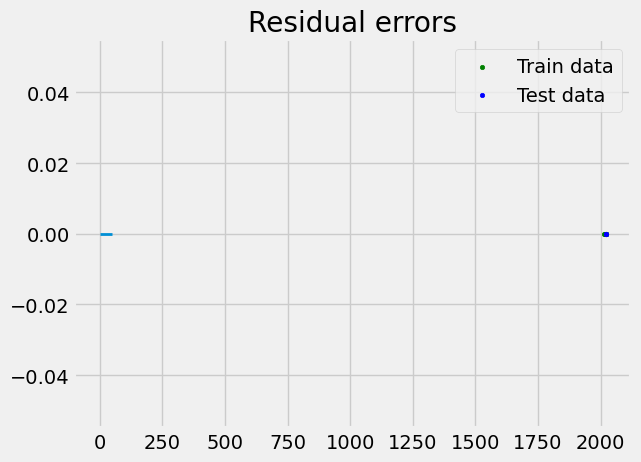

In [315]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

y = df_new.target
X = df_new.drop(["Date", "S/N"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: ', reg.coef_)
print(" ")
print("Intercept: ", reg.intercept_)
print(" ")
y_pred = reg.predict(X_test)
print("Predicted output:", y_pred)
print(" ")
print("Actual output:", y_test.values)
print(" ")
accuracy = reg.score(X_test, y_test)
print(f"Accuracy =: {accuracy} or {int(accuracy * 100)}%")

print(" ")

plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()